In [1]:
import sys
sys.path.append('../src')

from util import *
from rdkit import Chem
from rdkit.Chem import PandasTools

In [113]:
train_data_path = join(PATH.INPUT, 'train.csv')
train_data_0_path = join(PATH.INPUT, 'train_sdf', 'train_0.sdf')

dev_data_path   = join(PATH.INPUT, 'dev.csv')
dev_data_0_path = join(PATH.INPUT, 'dev_sdf', 'dev_0.sdf')

test_data_path  = join(PATH.INPUT, 'test.csv')
test_data_0_path = join(PATH.INPUT, 'test_sdf', 'test_0.sdf')

# 1. Data

In [120]:
data = pd.read_csv(train_data_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30274 entries, 0 to 30273
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            30274 non-null  object 
 1   SMILES         30274 non-null  object 
 2   S1_energy(eV)  30274 non-null  float64
 3   T1_energy(eV)  30274 non-null  float64
dtypes: float64(2), object(2)
memory usage: 946.2+ KB
None


,uid,SMILES,S1_energy(eV),T1_energy(eV)
0,train_0,CCC1CCCCN1C(=O)C(C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N,4.6747,3.3809
1,train_1,COc1ccc(Oc2ccc(N3C(=S)NC(c4ccccn4)C3c3cc(C)n(-c4cc(Cl)ccc4O)c3C)cc2)cc1,3.6617,3.4585
2,train_2,CC(=O)Nc1ccc(C(=O)[C@H](C)Sc2nnc(C3CCCCC3)o2)cc1,3.6420,3.1787
3,train_3,OC(CNC1CC1)CN1CCc2sccc2C1,4.8901,3.7847
4,train_4,CCNC(CCCC(F)(F)F)C1(OCC)CCOCC1,6.4967,6.2724


In [122]:
data = pd.read_csv(dev_data_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            71 non-null     object 
 1   SMILES         71 non-null     object 
 2   S1_energy(eV)  71 non-null     float64
 3   T1_energy(eV)  71 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.3+ KB
None


,uid,SMILES,S1_energy(eV),T1_energy(eV)
0,dev_0,O=C1c2ccccc2C2(c3ccccc31)c1ccccc1N(c1ccc(-c3nc(-c4ccccc4)nc(-c4ccccc4)n3)cc1)c1ccccc12,2.7609,2.7540
1,dev_1,Cc1cccc2c3ccccc3n(-c3ccc(-c4c(-c5ccccc5)c(C#N)c(C#N)c(-c5ccccc5)c4-c4ccc(-n5c6ccccc6c6cccc(C)c65)cc4)cc3)c12,3.0495,3.0163
2,dev_2,CC1(C)c2ccccc2-c2ccc(-c3c(F)c(F)c(-c4ccc5c(c4)C(C)(C)c4ccccc4-5)c4nsnc34)cc21,2.8314,2.1412
3,dev_3,CC(C)(C)c1ccc2c(c1)B1c3cc(C(C)(C)C)ccc3Oc3cc(-n4c5ccc(-n6c7ccccc7c7ccccc76)cc5c5cc(-n6c7ccccc7c7ccccc76)ccc54)cc(c31)O2,3.1813,2.9424
4,dev_4,O=C1c2cc(-c3ccc4c(c3)c3ccccc3n4-c3ccccc3)ccc2S(=O)(=O)c2ccc(-c3ccc4c(c3)c3ccccc3n4-c3ccccc3)cc21,2.9559,2.7362


In [123]:
data = pd.read_csv(test_data_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uid     602 non-null    object
 1   SMILES  602 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
None


,uid,SMILES
0,test_0,COc1ccc(S(=O)(=O)NC2CCN(C3CCCCC3)CC2)c(C)c1C
1,test_1,CC(CCCC1CCC2C3=C(CC[C@]12C)[C@@]1(C)CC[C@H](C)C(C)(C)[C@@H]1CC3)C(C)(C)O
2,test_2,C[C@@H]1C[C@@H]1c1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)NS(C)(=O)=O)n2Cc1ccc(F)cc1F
3,test_3,CCCn1c(=O)c2ccccc2n2c(SCC(=O)NC(Cc3ccccc3)c3ccccc3)nnc12
4,test_4,CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)OCc1cncs1)S(=O)(=O)c1ccc2nc(N)sc2c1


## 1.1 Molecule visualization

,ID,SMILES,MOLECULE
0,,CCC1CCCCN1C(=O)C(C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N,

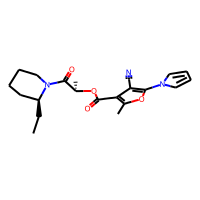

In [38]:
train_data_0 = PandasTools.LoadSDF(train_data_0_path, smilesName='SMILES', molColName='MOLECULE', isomericSmiles=False)
train_data_0

In [35]:
PandasTools.SaveXlsxFromFrame(train_data_0, 'data.xlsx', molCol='MOLECULE')

## 1.2 String analysis

In [112]:
with open(train_data_0_path, 'r') as f:
    data = f.readlines()

print("======================================================")
for i in range(4):
    print(f"line {i} |", data[i], end='')
print("======================================================")

temp = data[3].split()
astr = temp[0]
n = len(astr)
if n > 3:
    numxyz = int(astr[:n//2])
    numc   = int(astr[n/2:n])
else:
    numxyz = int(temp[0])
    numc   = int(temp[1])

xyz  = np.array([[0.0]*3 for j in range(numxyz)], dtype=np.float32)  # coordinates
atm  = np.array(['z' for i in range(numxyz)])      # atom names
conn = np.array([[0]*3 for j in range(numc)], dtype=np.int32)   # connections

for i in range(numxyz):
    ### xyz coordinates
    # x y z atom ... temp[4:] are ignored
    temp = data[4 + i].split()  
    xyz[i] = temp[:3]
    atm[i] = temp[3]  # atom symbol (e.g. C, Cl, Hg)

for i in range(numc):
    ### connections
    # atom1 atom2 type .  (temp[3] is ignored)
    temp = data[4 + i + numxyz].split()
    if len(temp) == 2:
        astr = temp[0]
        n    = len(astr)
        conn[i] = [astr[:n/2], astr[n/2:n], temp[1]]
    else:
        conn[i] = temp[:3]
        
print("1. Number of atoms:", numxyz)
print("xyz coordinates", '\n', xyz[:3], '\n')

print("2. Number of connections:", numc)
print("connections", '\n', conn[:3])

line 0 | 
line 1 |      RDKit          3D
line 2 | 
line 3 |  53 55  0  0  0  0  0  0  0  0999 V2000
1. Number of atoms: 53
xyz coordinates 
 [[ 2.9224 -2.33    0.4554]
 [ 3.3545 -1.0107  1.0984]
 [ 3.3381  0.2004  0.1379]] 

2. Number of connections: 55
connections 
 [[ 1  2  1]
 [ 1 29  1]
 [ 1 30  1]]
